In [1]:
# learning from source: https://www.youtube.com/watch?v=6s0QigVxdVI&t=655s
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set_style('white')

rcParams['figure.figsize'] = 8, 6

In [2]:
img = cv2.imread('./images/test/A/A0.jpeg', flags = cv2.IMREAD_COLOR)

In [3]:
img

array([[[  0,   3,  18],
        [  5,   8,  23],
        [  5,   8,  23],
        ...,
        [ 22,  34,  44],
        [ 19,  33,  45],
        [ 18,  32,  44]],

       [[  0,   0,  15],
        [  4,   7,  22],
        [  7,  10,  25],
        ...,
        [ 17,  32,  41],
        [ 24,  38,  50],
        [ 26,  40,  52]],

       [[  6,   9,  24],
        [  2,   5,  20],
        [  0,   2,  17],
        ...,
        [ 14,  29,  38],
        [ 20,  34,  46],
        [  6,  22,  34]],

       ...,

       [[ 52,  84, 143],
        [ 54,  87, 143],
        [ 48,  81, 137],
        ...,
        [  0,   2,   0],
        [  0,   3,   1],
        [  3,   6,   4]],

       [[ 38,  67, 128],
        [ 44,  74, 133],
        [ 35,  65, 124],
        ...,
        [  1,   6,   4],
        [  2,   7,   5],
        [  5,  10,   8]],

       [[ 47,  76, 137],
        [ 53,  82, 143],
        [ 49,  79, 138],
        ...,
        [  0,   3,   1],
        [  0,   2,   0],
        [  0,   3,   1]]

In [4]:
# order is H, W, Channels
img.shape

(4048, 3036, 3)

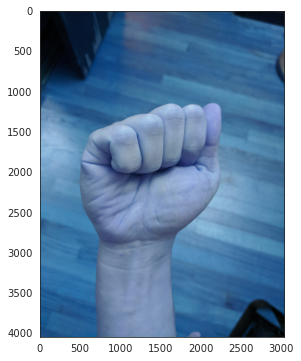

In [5]:
plt.imshow(img)

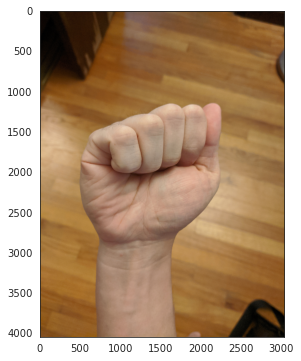

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(4048, 3036)


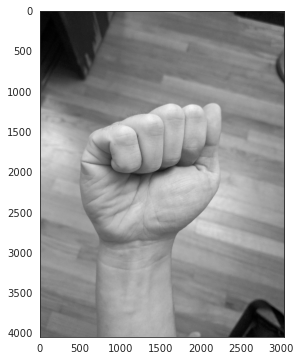

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

# Saving an Image

In [8]:
cv2.imwrite('./images/test/A/A0-gray.jpeg', gray)

True

In [9]:
def show_image(image, show_axis=True):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if not show_axis:
    plt.axis('off');

# Resizing

In [10]:
w, h = 128, 80
resized = cv2.resize(img, (w, h), cv2.INTER_LANCZOS4)

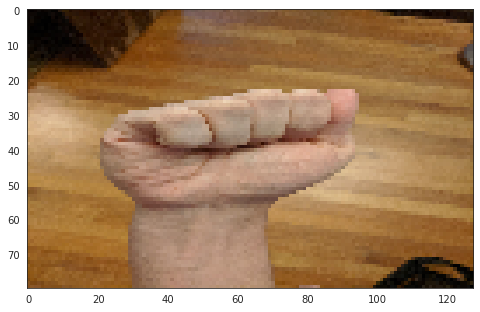

In [11]:
show_image(resized)

# Crop

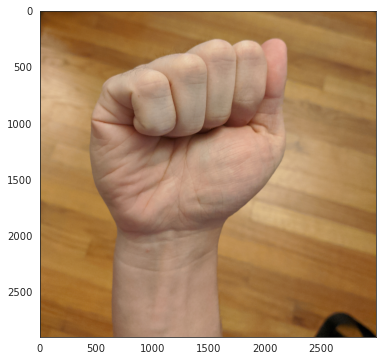

In [23]:
cropped = img[900: 3800, 50:3950]

show_image(cropped)

# Rotation

In [24]:
# Code by Adrian Rosebrock 
# https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/

def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

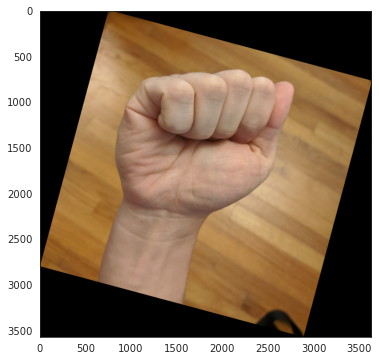

In [26]:
show_image(rotate_bound(cropped, 15))

# Blur an Image

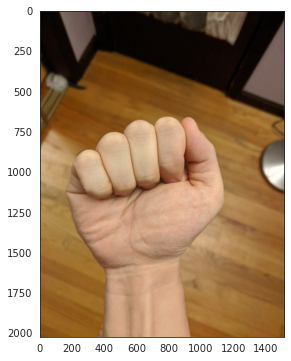

In [30]:
background = cv2.imread('./images/test/A/A1.jpeg', cv2.IMREAD_COLOR)

h , w, _ = background.shape

background = cv2.resize(background, (w//2, h//2))

show_image(background)

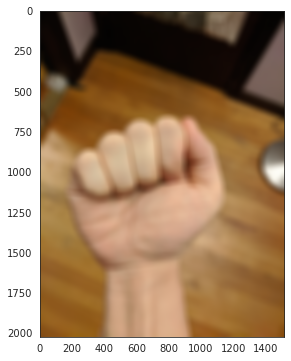

In [34]:
kernel_len = 51

blurred_background = cv2.GaussianBlur(background, (kernel_len, kernel_len), sigmaX = 120, sigmaY = 45)

show_image(blurred_background)

# Finding contours

In [38]:
_, binary = cv2.threshold(gray, 255, 255, type = cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

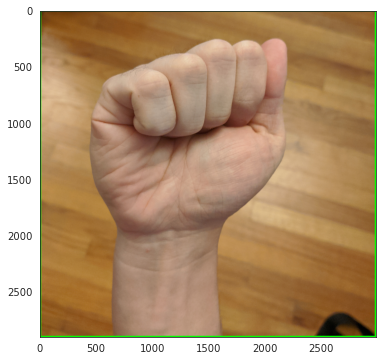

In [40]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = cropped.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)